In [ ]:
pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 6.2 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29879 sha256=b3ad3c249aec7c473d3a8e13fc38cb7544917cb3c09fe18c854a647de638802e
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11329 sha256=333761f3fa4b479e7ff196e69225fb9f359906744c35e7cc308fead7d5117c4f
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
from fancyimpute import KNN

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/thyroidDF.csv')
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


In [ ]:
df.shape

(9172, 31)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,9172.0,7.355582e+01,1.183977e+03,1.000000e+00,3.700000e+01,5.500000e+01,6.800000e+01,6.552600e+04
TSH,8330.0,5.218403e+00,2.418401e+01,5.000000e-03,4.600000e-01,1.400000e+00,2.700000e+00,5.300000e+02
T3,6568.0,1.970629e+00,8.875788e-01,5.000000e-02,1.500000e+00,1.900000e+00,2.300000e+00,1.800000e+01
TT4,8730.0,1.087003e+02,3.752267e+01,2.000000e+00,8.700000e+01,1.040000e+02,1.260000e+02,6.000000e+02
T4U,8363.0,9.760557e-01,2.003604e-01,1.700000e-01,8.600000e-01,9.600000e-01,1.065000e+00,2.330000e+00
FTI,8370.0,1.136407e+02,4.155165e+01,1.400000e+00,9.300000e+01,1.090000e+02,1.280000e+02,8.810000e+02
TBG,349.0,2.987006e+01,2.108050e+01,1.000000e-01,2.100000e+01,2.600000e+01,3.100000e+01,2.000000e+02
patient_id,9172.0,8.529473e+08,7.581969e+06,8.408010e+08,8.504090e+08,8.510040e+08,8.607110e+08,8.701190e+08


In [ ]:
df.describe(include='O').T

,count,unique,top,freq
sex,8865,2,F,6073
on_thyroxine,9172,2,f,7932
query_on_thyroxine,9172,2,f,9019
on_antithyroid_meds,9172,2,f,9056
sick,9172,2,f,8828
pregnant,9172,2,f,9065
thyroid_surgery,9172,2,f,9038
I131_treatment,9172,2,f,9003
query_hypothyroid,9172,2,f,8542
query_hyperthyroid,9172,2,f,8521


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured'
,'referral_source','patient_id', 'query_hypothyroid', 'query_hyperthyroid', 'query_on_thyroxine'],axis=1 ,inplace=True)

In [ ]:
target_counts = df['target'].value_counts()
fig = px.bar(x=target_counts.index, y=target_counts.values)
fig.update_layout(xaxis_title='Target', yaxis_title='Count', title='Distribution of Target')
fig.show()

In [ ]:
df['target'].unique()

array(['-', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C|I', 'O', 'LJ', 'H|K', 'D', 'GK', 'MI', 'P',
       'FK', 'B', 'GI', 'C', 'GKJ', 'OI', 'D|R', 'E'], dtype=object)

In [ ]:
df = df[df['target'].isin(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'AK', 'C|I', 'H|K', 'GK', 'FK', 'GI', 'GKJ', 'D|R', '-'])]

In [ ]:
df.shape

(7679, 20)

In [ ]:
mapping = {'-':"Negative",
           'A':'Hyperthyroid','AK':"Hyperthyroid",'B':"Hyperthyroid", 'C':"Hyperthyroid", 'C|I': 'Hyperthyroid', 'D':"Hyperthyroid", 'D|R':"Hyperthyroid",
           'E': "Hypothyroid", 'F': "Hypothyroid", 'FK': "Hypothyroid", "G": "Hypothyroid", "GK": "Hypothyroid", "GI": "Hypothyroid", 'GKJ': 'Hypothyroid', 'H|K': 'Hypothyroid',
          }
df['target'] = df['target'].map(mapping)

In [ ]:
df['target'].unique()

array(['Negative', 'Hypothyroid', 'Hyperthyroid'], dtype=object)

In [ ]:
target_dist = pd.DataFrame(df['target'].value_counts())
target_dist

,count
target,
Negative,6771
Hypothyroid,667
Hyperthyroid,241


In [ ]:
import pandas as pd
import plotly.express as px

target_dist = pd.DataFrame(df['target'].value_counts()).reset_index()
target_dist.columns = ['target', 'count']

custom_colors = ["#BEE9E9","#6C7B8B", "#3A506B"]

fig = px.pie(target_dist, names='target', values='count',
             color='target',
             color_discrete_sequence=custom_colors)

fig.update_layout(
    title={
        'text': "Target Distribution",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_size=20
)

fig.update_traces(textinfo='label+percent', textfont_size=14)

fig.show()


In [ ]:
df = df[df['age'] < 100]

In [ ]:

null_cols = df.columns[df.isnull().any()]
nulls_df = df.loc[:, null_cols]
nulls_df = pd.DataFrame(nulls_df.isna().sum()/df.shape[0]*100)
nulls_df = nulls_df.rename(columns={0: 'Missing Values %'})
nulls_df

,Missing Values %
sex,3.309446
TSH,9.433225
T3,28.768730
TT4,4.612378
T4U,8.872964
FTI,8.781759
TBG,96.625407


In [ ]:
df = df.drop('TBG', axis=1)

In [ ]:
df.shape

(7675, 19)

In [ ]:
origin = pd.DataFrame(df['target'].value_counts())
after = pd.DataFrame(df.dropna(thresh=19)['target'].value_counts())
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'domain'}, {'type': 'domain'}]])
fig.add_trace(go.Pie(labels=origin.index, values=origin['count'], marker=dict(colors=["#BEE9E9","#6C7B8B", '3A506B'])), row=1, col=1)
fig.add_trace(go.Pie(labels=after.index, values=after['count'], marker=dict(colors=["#BEE9E9","#6C7B8B", '3A506B'])), row=1,col=2)

fig.show()

In [ ]:
df = df.dropna(thresh=19)

In [ ]:
df.shape

(4778, 19)

In [ ]:
def rolette_fill(df, column, val1, val2):
    threshold = df[column].value_counts()[val1] / (df.shape[0] - df[column].isnull().sum())

    for i in df.index:
        if pd.isna(df.loc[i, column]) or pd.isnull(df.loc[i, column]):
            rand_num = np.random.rand()
            if rand_num > threshold:
                df.loc[i, column] = val2
            else:
                df.loc[i, column] = val1

    return df

In [ ]:
df = rolette_fill(df.copy(), 'sex', 'F', 'M')

In [ ]:
columns = ['sex', 'age', 'TT4', 'T3', 'T4U', 'FTI', 'TSH']
b_fill_df = df.loc[:, columns]

In [ ]:
b_fill_df = b_fill_df.fillna(np.nan)

In [ ]:
sex_to_num = {
    'F':0,
    'M':1,
}
b_fill_df['sex'] = b_fill_df['sex'].map(sex_to_num)

In [ ]:
knn = KNN(k=13)
knn_imputed_df = knn.fit_transform(b_fill_df)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/fancyimpute/solver.py:55: UserWarning:

Input matrix is not missing any values

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



Imputing row 1/4778 with 0 missing, elapsed time: 3.488
Imputing row 101/4778 with 0 missing, elapsed time: 3.488
Imputing row 201/4778 with 0 missing, elapsed time: 3.489
Imputing row 301/4778 with 0 missing, elapsed time: 3.489
Imputing row 401/4778 with 0 missing, elapsed time: 3.489
Imputing row 501/4778 with 0 missing, elapsed time: 3.489
Imputing row 601/4778 with 0 missing, elapsed time: 3.490
Imputing row 701/4778 with 0 missing, elapsed time: 3.490
Imputing row 801/4778 with 0 missing, elapsed time: 3.490
Imputing row 901/4778 with 0 missing, elapsed time: 3.490
Imputing row 1001/4778 with 0 missing, elapsed time: 3.491
Imputing row 1101/4778 with 0 missing, elapsed time: 3.491
Imputing row 1201/4778 with 0 missing, elapsed time: 3.491
Imputing row 1301/4778 with 0 missing, elapsed time: 3.491
Imputing row 1401/4778 with 0 missing, elapsed time: 3.492
Imputing row 1501/4778 with 0 missing, elapsed time: 3.492
Imputing row 1601/4778 with 0 missing, elapsed time: 3.492
Imputing 

In [ ]:
knn_imputed_df = pd.DataFrame(knn_imputed_df, index=b_fill_df.index)
knn_imputed_df = knn_imputed_df.rename(columns=dict(zip(knn_imputed_df.columns,columns)))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
df.update(knn_imputed_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
import plotly.express as px

fig = px.histogram(df, x="TSH", color="target", barmode="overlay",
                  color_discrete_map={'Hypothyroid': '#4b9546', 'Hyperthyroid': '#F65366', 'Negative': '#3498db'})

fig.update_layout(title_text='TSH Level by Diagnosis', yaxis_title='Count')
fig.update_traces(opacity=0.75)
fig.update_xaxes(range= [0,11])
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<frozen importlib._bootstrap>:914: ImportWarning:

_PyDrive2ImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_PyDriveImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_GenerativeAIImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_OpenCVImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: Imp

In [ ]:
df.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Index(['age', 'sex', 'on_thyroxine', 'on_antithyroid_meds', 'sick', 'pregnant',
       'thyroid_surgery', 'I131_treatment', 'lithium', 'goitre', 'tumor',
       'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'target'],
      dtype='object')

In [ ]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,0
age,0
sex,0
on_thyroxine,0
on_antithyroid_meds,0
sick,0
pregnant,0
thyroid_surgery,0
I131_treatment,0
lithium,0
goitre,0


In [ ]:
df['target'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



array(['Negative', 'Hyperthyroid', 'Hypothyroid'], dtype=object)

In [ ]:
df['pregnant'] = df['pregnant'].replace({'t': 1, 'f': 0})
target_to_num = {
    'Negative': 0,
    'Hypothyroid':1,
    'Hyperthyroid':2,
}
df['target'] = df['target'].map(target_to_num)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-36-671a8e836df3>:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [ ]:
df=df.replace({'f':0,'F':0,'t':1,'T':1})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-37-964923279ce1>:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

<ipython-input-37-964923279ce1>:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

<ipython-input-37-964923279ce1>:1: FutureWarni

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<frozen importlib._bootstrap>:914: ImportWarning:

_PyDrive2ImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_PyDriveImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_GenerativeAIImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_OpenCVImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: Imp

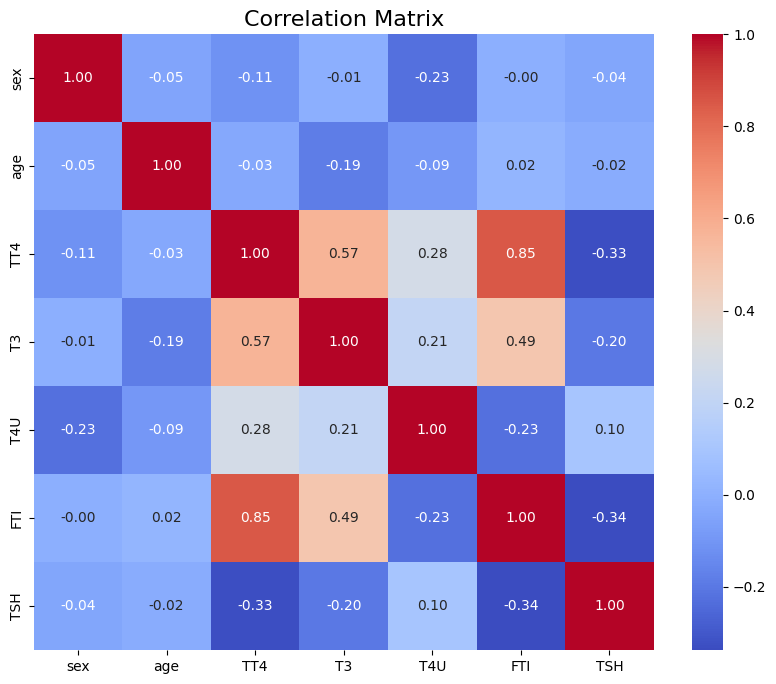

<frozen importlib._bootstrap>:914: ImportWarning:

_PyDrive2ImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_PyDriveImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_GenerativeAIImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_OpenCVImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_BokehImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_AltairImportHook.find_spec() not found; falling back to find_module()



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called 'df'

# Calculate the correlation matrix
columns = ['sex', 'age', 'TT4', 'T3', 'T4U', 'FTI', 'TSH']
corr_df = df.loc[:,columns]
correlation_matrix = corr_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

# Create the heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Add a title
plt.title("Correlation Matrix", fontsize=16)

# Display the plot
plt.show()


In [ ]:
x = df.iloc[:, :-1]
y = df.iloc[:,-1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,age,sex,on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,target
19,36,0.0,0,0,0,0,0,0,0,0,0,0,0,1.50,2.4,90.0,1.06,85.0,0
21,40,0.0,0,0,0,0,0,0,0,0,0,0,0,1.20,2.3,104.0,1.08,96.0,0
22,40,0.0,0,0,0,0,0,0,0,0,0,0,0,5.90,2.1,88.0,0.84,105.0,0
23,77,0.0,0,0,0,0,0,0,0,0,0,0,0,0.05,2.4,107.0,1.13,95.0,0
27,51,0.0,0,0,0,0,0,0,0,0,0,0,0,0.05,2.1,93.0,0.87,106.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,65,1.0,0,0,0,0,0,0,0,0,0,0,0,0.73,1.8,85.0,0.90,94.0,0
9130,65,0.0,1,0,0,0,0,1,0,0,0,0,0,4.10,2.1,135.0,1.19,113.0,0
9134,74,0.0,0,0,1,0,0,0,0,0,0,0,0,53.00,1.0,49.0,1.25,39.0,1
9137,42,0.0,1,0,0,0,0,0,0,0,0,0,0,2.30,1.3,59.0,0.73,81.0,0


In [ ]:
pip install --upgrade xgboost scikit-learn


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:

from imblearn.over_sampling import SMOTE, ADASYN

x_smot, y_smot = SMOTE().fit_resample(x, y)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<frozen importlib._bootstrap>:914: ImportWarning:

_PyDrive2ImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_PyDriveImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_GenerativeAIImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_OpenCVImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: Imp

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_smot, y_smot, test_size=0.33, random_state=89)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



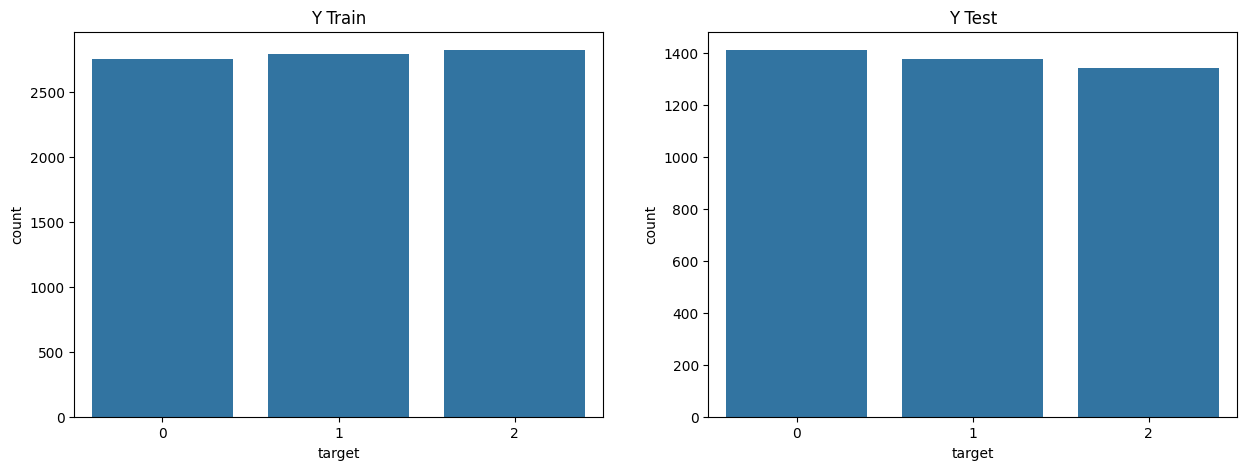

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(x= y_train, ax=axs[0])
axs[0].set_title('Y Train')

sns.countplot(x= y_test, ax=axs[1])
axs[1].set_title('Y Test')

fig.show()

In [ ]:
print("Training set size:", x_train.shape, y_train.shape)
print("Testing set size:", x_test.shape, y_test.shape)


Training set size: (8371, 18) (8371,)
Testing set size: (4124, 18) (4124,)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(x_train, y_train)
y_test_logistic = logistic.predict(x_test)
y_train_logistic = logistic.predict(x_train)
print("Accuracy:", accuracy_score(y_test_logistic, y_test))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Accuracy: 0.9546556741028128


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
test_precision = precision_score(y_test, y_test_logistic, average='weighted') * 100
test_recall = recall_score(y_test, y_test_logistic, average='weighted') * 100
test_f1 = f1_score(y_test, y_test_logistic, average='weighted') * 100
test_accuracy_logistic = accuracy_score(y_test, y_test_logistic) * 100


train_accuracy_logistic = accuracy_score(y_train, y_train_logistic) * 100

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
labels = ['Precision', 'Recall', 'F1-Score', 'Training', 'Testing']
colors = ['#ff7f0e', '#17becf', '#1f77b4', '#2ca02c','#9467bd']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



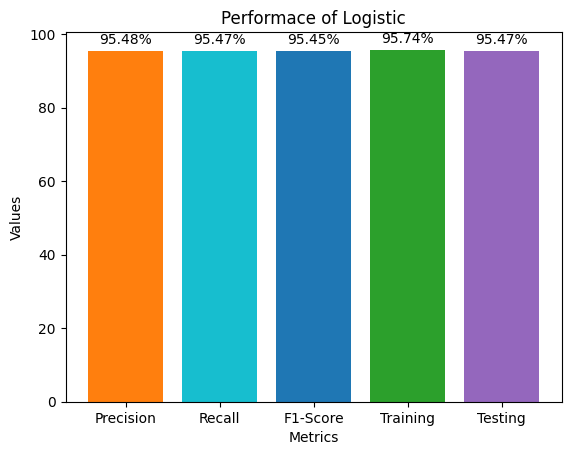

In [ ]:
import matplotlib.pyplot as plt

metrics = [test_precision, test_recall, test_f1, train_accuracy_logistic, test_accuracy_logistic]
bars = plt.bar(labels, metrics, color=colors)

plt.bar(labels, metrics, color=colors)


plt.title('Performace of Logistic')
plt.xlabel('Metrics')
plt.ylabel('Values')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom', color='black')


plt.show()

In [ ]:
from sklearn import svm

SVM = svm.SVC(kernel='linear')
SVM.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<frozen importlib._bootstrap>:914: ImportWarning:

_PyDrive2ImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_PyDriveImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_GenerativeAIImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_OpenCVImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: Imp

SVC(kernel='linear')

In [ ]:

y_train_svm = SVM.predict(x_train)
y_test_svm = SVM.predict(x_test)

print(accuracy_score(y_train, y_train_svm))
print(accuracy_score(y_test, y_test_svm))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0.9769442121610321
0.9769641125121241


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Calculate metrics for testing data
test_precision = precision_score(y_test, y_test_svm, average='weighted') * 100
test_recall = recall_score(y_test, y_test_svm, average='weighted') * 100
test_f1 = f1_score(y_test, y_test_svm, average='weighted') * 100
test_accuracy_svm = accuracy_score(y_test, y_test_svm) * 100

# Calculate training accuracy only
train_accuracy_svm = accuracy_score(y_train, y_train_svm) * 100

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



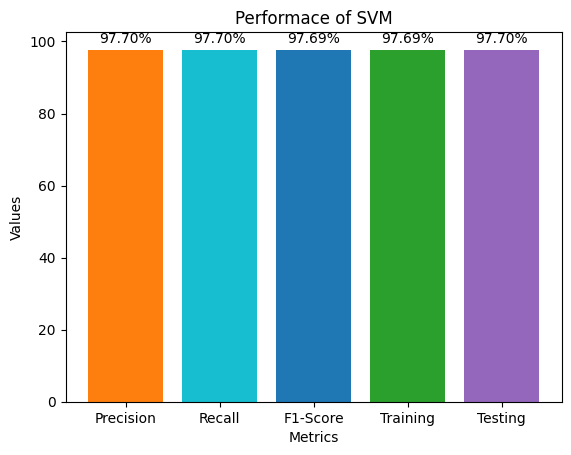

In [ ]:
import matplotlib.pyplot as plt

metrics = [test_precision, test_recall, test_f1, train_accuracy_svm, test_accuracy_svm]
bars = plt.bar(labels, metrics, color=colors)
plt.bar(labels, metrics, color=colors)

plt.title('Performace of SVM')
plt.xlabel('Metrics')
plt.ylabel('Values')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom', color='black')

plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_test_dt = decision_tree.predict(x_test)
y_train_dt = decision_tree.predict(x_train)
print("Accuracy:", accuracy_score(y_test, y_test_dt))

Accuracy: 0.9910281280310378


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
test_precision = precision_score(y_test, y_test_dt, average='weighted') * 100
test_recall = recall_score(y_test, y_test_dt, average='weighted') * 100
test_f1 = f1_score(y_test, y_test_dt, average='weighted') * 100
test_accuracy_dt = accuracy_score(y_test, y_test_dt) * 100

train_accuracy_dt = accuracy_score(y_train, y_train_dt) * 100

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



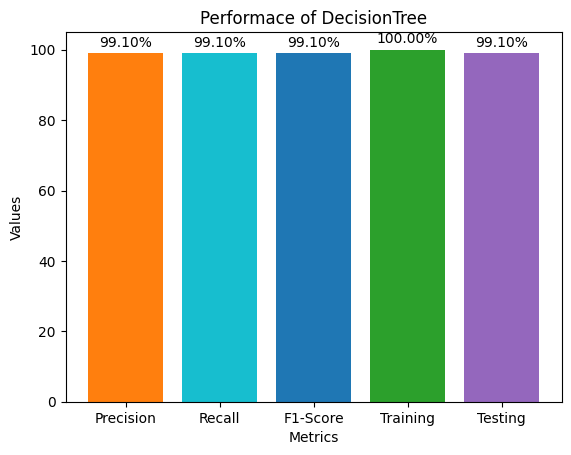

In [ ]:
import matplotlib.pyplot as plt

metrics = [test_precision, test_recall, test_f1, train_accuracy_dt, test_accuracy_dt]
bars = plt.bar(labels, metrics, color=colors)

plt.bar(labels, metrics, color=colors)

plt.title('Performace of DecisionTree')
plt.xlabel('Metrics')
plt.ylabel('Values')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom', color='black')


plt.show()

In [ ]:
pip install --upgrade xgboost


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
import sklearn
import xgboost

print("scikit-learn version:", sklearn.__version__)
print("xgboost version:", xgboost.__version__)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<frozen importlib._bootstrap>:914: ImportWarning:

_PyDrive2ImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_PyDriveImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_GenerativeAIImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_OpenCVImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: Imp

scikit-learn version: 1.6.0
xgboost version: 2.1.3


<frozen importlib._bootstrap>:914: ImportWarning:

_PyDrive2ImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_PyDriveImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_GenerativeAIImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_OpenCVImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_BokehImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_AltairImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_PyDrive2ImportHook.find_spec() not found; falling back to find_module

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_test_xgb = xgb.predict(x_test)
y_train_xgb = xgb.predict(x_train)
print("Accuracy:", accuracy_score(y_test, y_test_xgb))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Accuracy: 0.9924830261881669


In [ ]:
test_precision = precision_score(y_test, y_test_xgb, average='weighted') * 100
test_recall = recall_score(y_test, y_test_xgb, average='weighted') * 100
test_f1 = f1_score(y_test, y_test_xgb, average='weighted') * 100
test_accuracy_xgb = accuracy_score(y_test, y_test_xgb) * 100

train_accuracy_xgb = accuracy_score(y_train, y_train_xgb) * 100

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



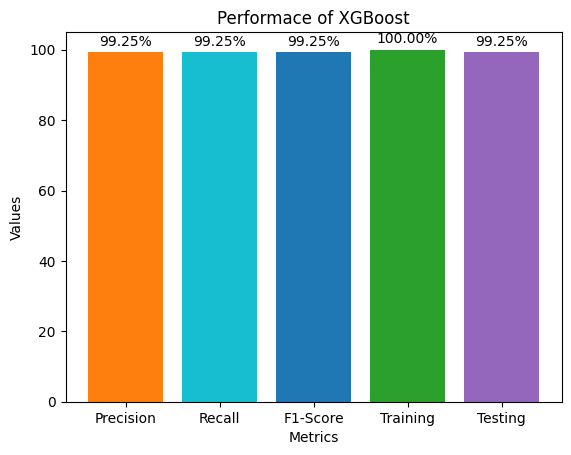

In [ ]:
import matplotlib.pyplot as plt

metrics = [test_precision, test_recall, test_f1, train_accuracy_xgb, test_accuracy_xgb]
bars = plt.bar(labels, metrics, color=colors)

plt.bar(labels, metrics, color=colors)

plt.title('Performace of XGBoost')
plt.xlabel('Metrics')
plt.ylabel('Values')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom', color='black')

plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



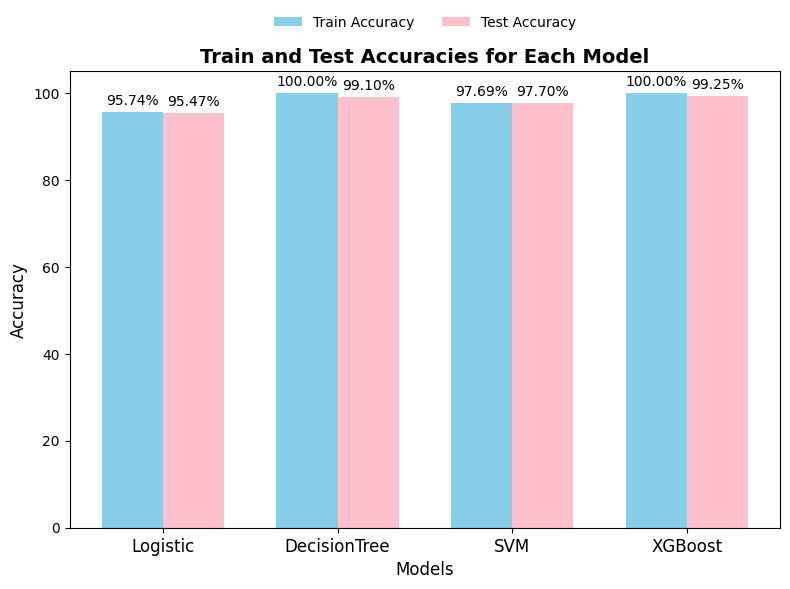

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Logistic', 'DecisionTree', 'SVM', 'XGBoost']
train_accuracies = [train_accuracy_logistic, train_accuracy_dt,train_accuracy_svm,train_accuracy_xgb]
test_accuracies = [test_accuracy_logistic,test_accuracy_dt,test_accuracy_svm,test_accuracy_xgb]

x = np.arange(len(models))

width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x - width/2, train_accuracies, width, label='Train Accuracy', color='skyblue')
bars2 = ax.bar(x + width/2, test_accuracies, width, label='Test Accuracy', color='pink')

ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Train and Test Accuracies for Each Model', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=12)
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2, fontsize=10,frameon=False)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



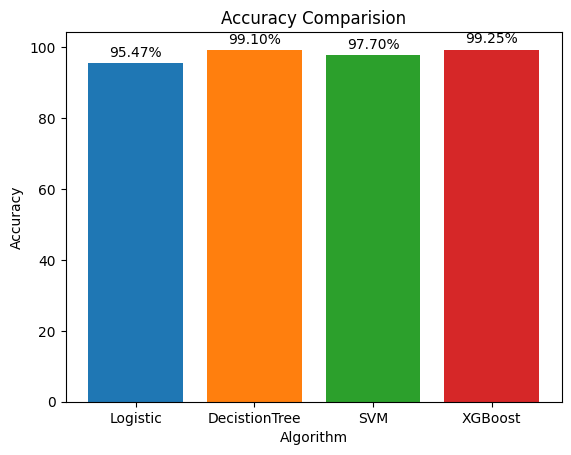

In [ ]:
import matplotlib.pyplot as plt

metrics = [test_accuracy_logistic, test_accuracy_dt, test_accuracy_svm, test_accuracy_xgb]
labels = ['Logistic', 'DecistionTree', 'SVM', 'XGBoost']

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
bars = plt.bar(labels, metrics, color=colors)

plt.bar(labels, metrics, color=colors)

plt.title('Accuracy Comparision')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom', color='black')

plt.show()


In [ ]:
import pickle
with open("xgb_model_final.pkl", "wb") as file:
    pickle.dump(xgb, file)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

